# Part II - Fraud Transactions Dataset Explanatory Analysis
## by Ammar Saleh

## Investigation Overview

> In this explanatory analysis we want to understand what are the factors that causes a transaction to be fraud and how can we prevent fraud transactions from increasing.

## Key Insights

> Here are the key insights which is going help us to understand which factors could be increasing the frauds count:  
Insight 1: Which category is associated with the highest count of frauds transactions?  
Insight 2: What are the top 15 ZIP codes that has the highest fraud transactions?  
Insight 3: What job is associated with the highest fraud transactions?  
Insight 4: What are the top 15 cities and states with the highest frauds transactions count?  
Insight 5: Which Month And Day Has The Highest And Lowsest Count Of Fraud Transactions?  
Insight 6: What Transactions Cost Range Has the Highest Precentage Of Fraud Transactions?  
Insight 7: What Is The Difference Fraud And Normal Transactions For Each Category?

## Dataset Overview

In [1]:
import sys # We will import sys to append path of modules
sys.path.append('../modules')
import pandas as pd # Import Pandas to load dataset
import explanatory_plots_module as exp_plt_mod # This module is going to contain the code for all the plots that we are going to use in the explanatory analysis to keep this notebook organized.
# Show plots without calling plt.show()
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_transactions_clean = pd.read_csv('../fraud-detection/fraudTrain_clean.csv', parse_dates=['trans_datetime'])

In [3]:
exp_plt_mod.Init(df_transactions_clean)

In [4]:
df_transactions_clean.head()

,trans_datetime,cc_num,merchant,category,amt,first_name,last_name,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_id,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,False
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,False
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,False
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,False
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,False


In [5]:
df_transactions_clean.tail()

,trans_datetime,cc_num,merchant,category,amt,first_name,last_name,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_id,merch_lat,merch_long,is_fraud
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,36.841266,-111.690765,False
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,38.906881,-78.246528,False
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,33.619513,-105.130529,False
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,42.788940,-103.241160,False
1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,...,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,46.565983,-114.186110,False


In [6]:
df_transactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   trans_datetime  1296675 non-null  datetime64[ns]
 1   cc_num          1296675 non-null  int64         
 2   merchant        1296675 non-null  object        
 3   category        1296675 non-null  object        
 4   amt             1296675 non-null  float64       
 5   first_name      1296675 non-null  object        
 6   last_name       1296675 non-null  object        
 7   gender          1296675 non-null  object        
 8   street          1296675 non-null  object        
 9   city            1296675 non-null  object        
 10  state           1296675 non-null  object        
 11  zip             1296675 non-null  int64         
 12  lat             1296675 non-null  float64       
 13  long            1296675 non-null  float64       
 14  city_pop        12

## Visualization 1: Count Of Fraud Transactions Per Category
> In this visualization we are going to see the the count of fraud transactions for each category.

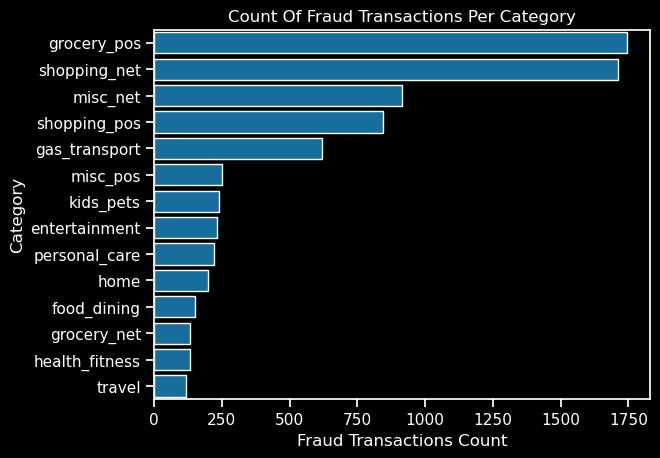

In [7]:
exp_plt_mod.ExpVisualization1()

> This plot shows the count of fraud transactions for each category, the purpose of this plot is to show which category has the highest count of fraud transactions.

### Observation

> We can see that the grocery point of sales has the highest frauds count.

## Visualization 2: Top 15 ZIP Codes With Highest Fraud Transactions
> In this visualization we are going to see top 15 ZIP codes with highest fraud transactions.

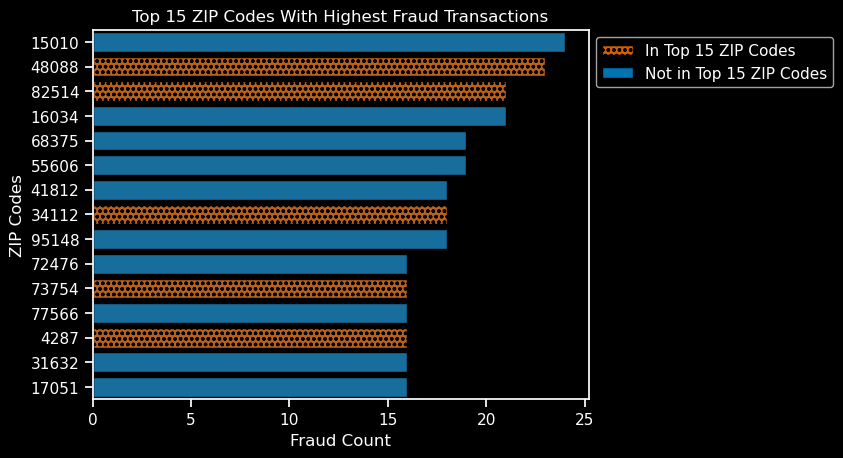

In [8]:
exp_plt_mod.ExpVisualization2()

> This plot shows top 15 ZIP codes with the highest count of fraud transactions with highlighting bars with orange if its in top 15 ZIP codes with highest transactions, the purpose of this plot is to check if ZIP codes higher transactions count has higher count of fraud transactions.

### Observation

> We can see that some ZIP codes with high transactions count has higher fraud transactions.

## Visualization 3: Top 15 Jobs With The Highest Frauds Count
> In this visualization we are going to see top 15 jobs with the highest frauds count.

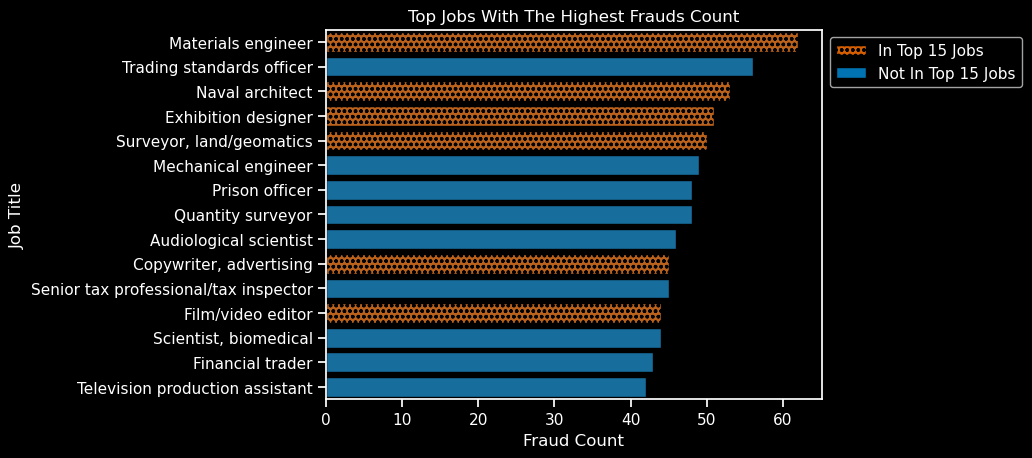

In [9]:
exp_plt_mod.ExpVisualization3()

> This plot show top 15 jobs with the highest frauds count, the purpose of this plot is to find which jobs has the highest count of fraud and if a job with high transactions count is associated with higher fraud transactions.

### Observation

> Similarly to ZIP codes we can see that some jobs with high transactions count has higher fraud transactions.

## Visualization 4: Top 15 City And State With The Highest Fraud Transactions Count
> In this visualization we are going to see top 15 city and state with the highest fraud transactions count.

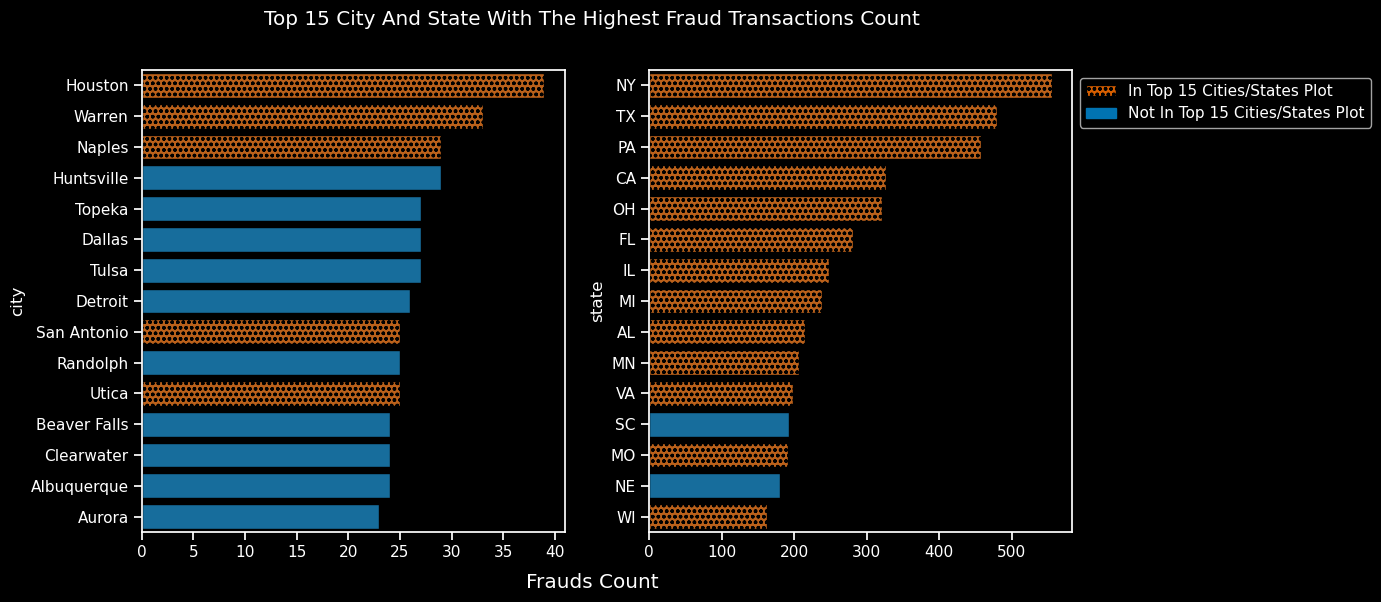

In [10]:
exp_plt_mod.ExpVisualization4()

> This plot shows top 15 city and state with the highest fraud transactions count, the purpose of this plot is to find if cities and states with higher transactions count are associated with higher frauds count. 

### Observation

> We can see that most of states with high transactions count has higher count of fraud transactions but for cities not most of cities with high transactions count has higher count of fraud transactions.

## Visualization 5: Count Of Fraud Transactions For Each Month And Day
In this visualization we are going to see the count of fraud transactions for each month and day.

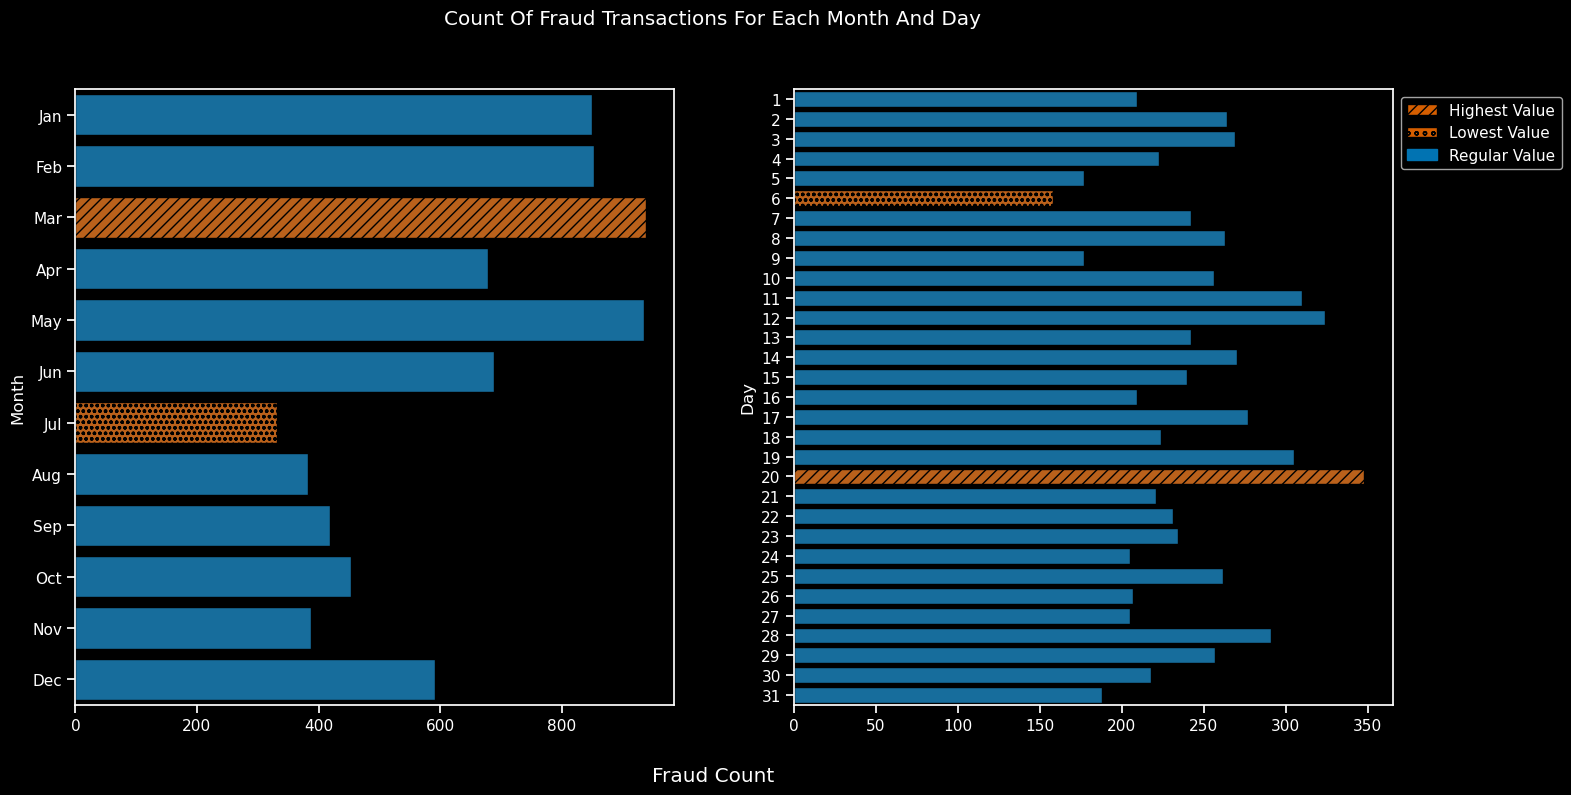

In [11]:
exp_plt_mod.ExpVisualization5()

> This plot shows the count of fraud transactions for each month and day, the purpose of this plot is to find with month and day has the highest and lowest count of fraud transactions.

### Observation

> We can see that Mar and Day 20 has the highest count of fraud transactions and Jul and Day 6 has the lowest count of fraud transactions.

## Visualization 6: Distribution Of Transactions Cost Against Fraud Transactions
> In this visualization we are going to see the distribution of transactions cost against fraud transactions.

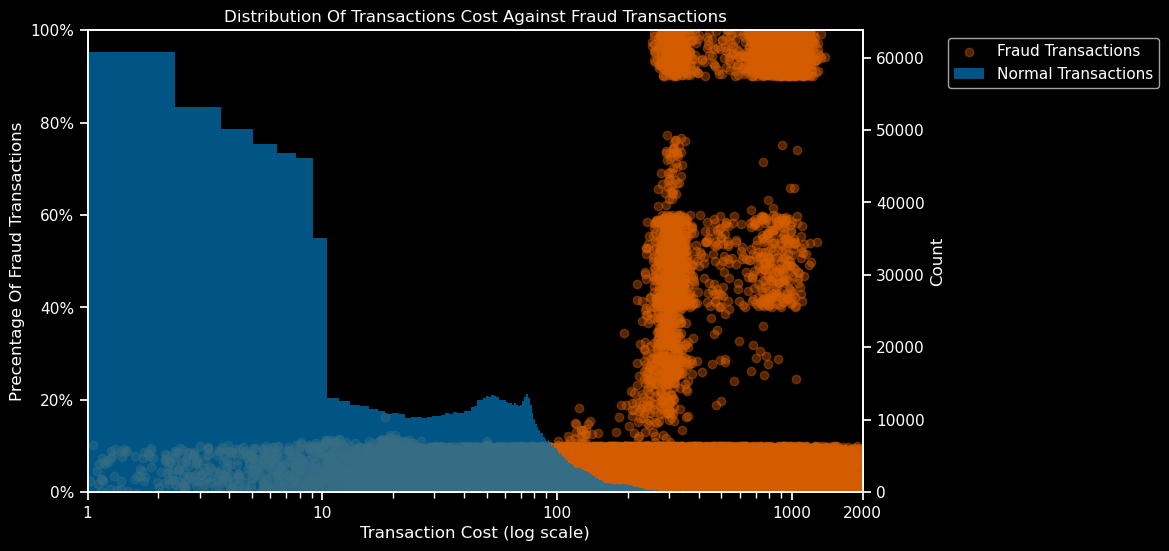

In [12]:
exp_plt_mod.ExpVisualization6()

> This plot shows the distribution of transactions cost against fraud transactions, the purpose of this plot is to show the difference between normal and fraud transactions and the transactiosn cost range.

### Observation

> We can see that transactions that costs from 200-1000 has the highest precentage of fraud transactions.

## Visualization 7: Difference Between Fraud And Normal Transactions For Each Category
> In this visualization we are going to see the difference between fraud and normal transactions for each category with the cost of the transaction.

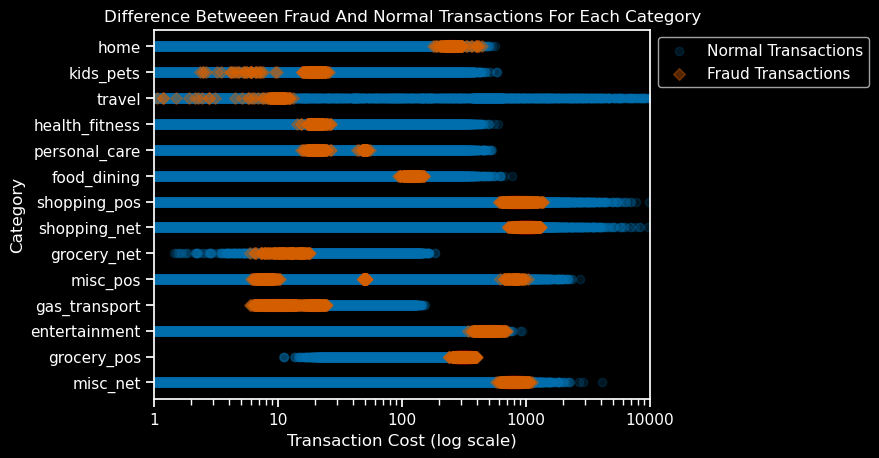

In [13]:
exp_plt_mod.ExpVisualization7()

> This plot shows the difference between fraud and normal transactions for each category, the purpose of this plot is to see the normal and fraud transactions cost range and frequency for each category.

### Observation

> We can see that travel has the lowest fraud transactions count/cost while shopping point of sale has the has the highest fraud transactions cost.

## Conclusion

* The security of transactions should be increased for categories like groccery point of sale, shopping net because they have high amount of fraud transaction, its recommended to check the activity ot transactions that comes from these categories.
* Some of ZIP codes with high transactions count are associated with some amount of frauds count but its not that much like states, jobs but its better to check the transactions activity for ZIP codes with highest frauds count.
* The security of transactions from jobs with high transactions count should be increase because of jobs with high transactions count are associated with high frauds count especially Materials engineer, Trading standards officer, Naval architech which has the highest frauds count.
* The security of transactions for most states with high transactions count should be increased because most of the states with high transactions count is associated with high frauds count.

* The security of transactions should be increase from Jan-Jun especially Mar because it has the highest count of fraud transactions and for Day 20.
* Most of fraud transactions costs from 200-1000 so any transaction with this price range or more should be check manually to decrease the frauds count.
* Transactions with high cost that comes from categories like misc_net, shopping_pos, shopping_net, misc_pos should be checked because these categories has the highest fraud transactions cost.

In [14]:
#!jupyter nbconvert Part_II_explanatory_slides.ipynb --to slides --post serve --no-input --no-prompt